# **Question 9**

Saving A3_P1.csv to A3_P1 (3).csv
Optimal number of clusters determined by elbow method: 4


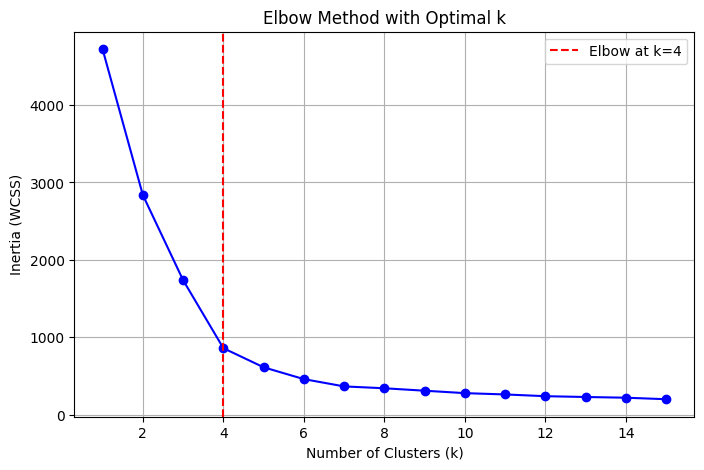

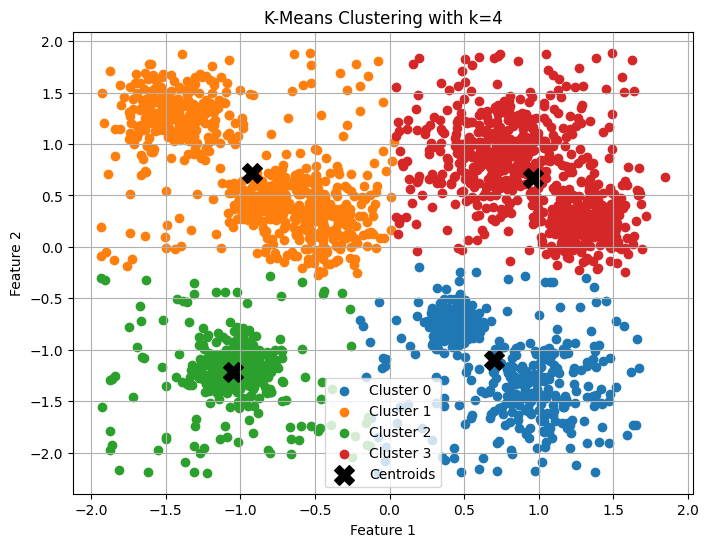

In [8]:
!pip install kneed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('A3_P1.csv')

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Computing inertia for K = 1 to 15
inertia = []
K = range(1, 16)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Using KneeLocator to find the elbow point
kneedle = KneeLocator(K, inertia, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow
print(f"Optimal number of clusters determined by elbow method: {optimal_k}")

# Plotting WCSS vs. K with knee point
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Elbow at k={optimal_k}')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method with Optimal k')
plt.legend()
plt.grid(True)
plt.show()

# Performing KMeans clustering with optimal_k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
df['Cluster'] = clusters

plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(data_scaled[clusters == i, 0], data_scaled[clusters == i, 1], label=f'Cluster {i}')

# Plotting centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.legend()
plt.grid(True)
plt.show()

# **Question 10**

Saving A3_P2.csv to A3_P2 (3).csv
Single Linkage


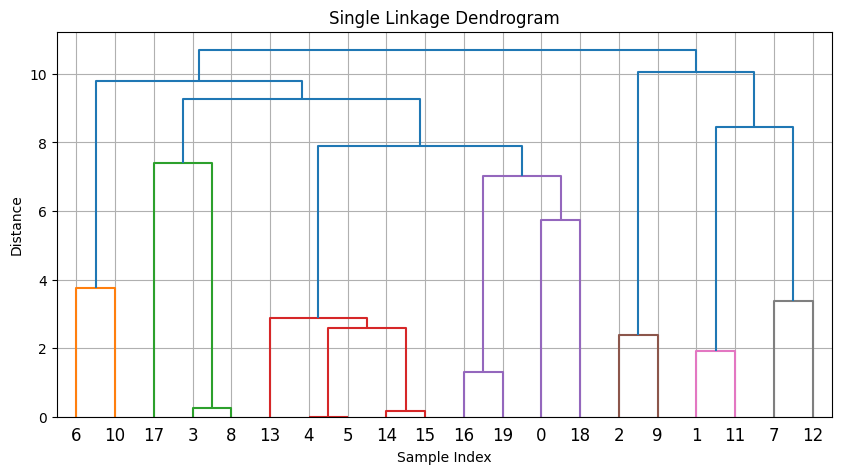

Complete Linkage


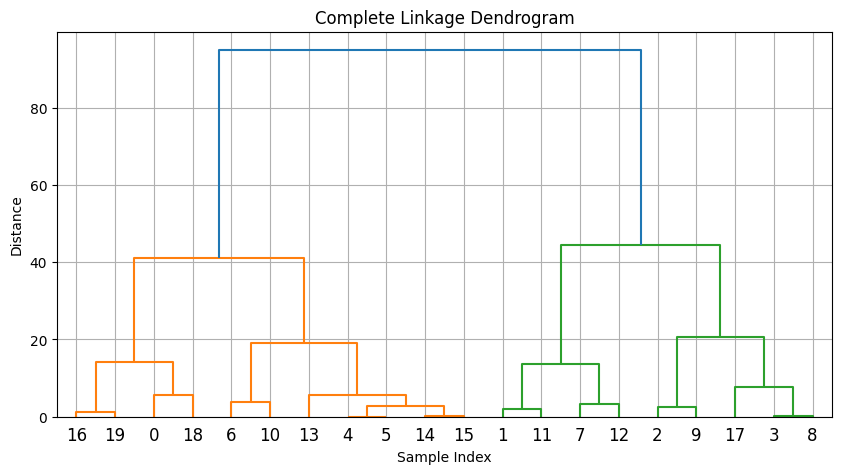

Average Linkage


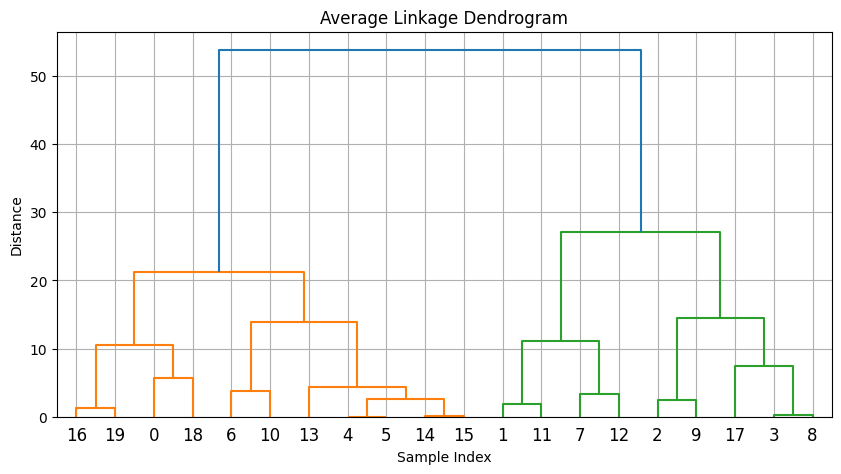

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('A3_P2.csv')
data = df.values
n = len(data)

# Defining distance functions
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def single_linkage(c1, c2):
    return min(euclidean(p1, p2) for p1 in c1 for p2 in c2)

def complete_linkage(c1, c2):
    return max(euclidean(p1, p2) for p1 in c1 for p2 in c2)

def average_linkage(c1, c2):
    distances = [euclidean(p1, p2) for p1 in c1 for p2 in c2]
    return sum(distances) / len(distances)

# Hierarchical clustering
def hierarchical_clustering(data, linkage_func):
    clusters = {i: [i] for i in range(len(data))}
    distances = {}
    Z = []
    current_cluster_id = len(data)

    # Computing all pairwise distances
    for i in range(len(data)):
        for j in range(i+1, len(data)):
            distances[(i, j)] = linkage_func([data[i]], [data[j]])

    while len(clusters) > 1:
        # Finding the two closest clusters
        min_pair = None
        min_dist = float('inf')

        keys = list(clusters.keys())
        for i in range(len(keys)):
            for j in range(i+1, len(keys)):
                c1, c2 = keys[i], keys[j]
                d = linkage_func([data[k] for k in clusters[c1]], [data[k] for k in clusters[c2]])
                if d < min_dist:
                    min_dist = d
                    min_pair = (c1, c2)

        i, j = min_pair
        new_cluster = clusters[i] + clusters[j]
        Z.append([i, j, min_dist, len(new_cluster)])
        clusters[current_cluster_id] = new_cluster

        # Removing merged clusters
        del clusters[i]
        del clusters[j]
        current_cluster_id += 1

    return np.array(Z)

# Plotting dendrogram
def plot_dendrogram(Z, title):
    plt.figure(figsize=(10, 5))
    dendrogram(Z)
    plt.title(title)
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.grid(True)
    plt.show()

print("Single Linkage")
Z_single = hierarchical_clustering(data, single_linkage)
plot_dendrogram(Z_single, "Single Linkage Dendrogram")

print("Complete Linkage")
Z_complete = hierarchical_clustering(data, complete_linkage)
plot_dendrogram(Z_complete, "Complete Linkage Dendrogram")

print("Average Linkage")
Z_average = hierarchical_clustering(data, average_linkage)
plot_dendrogram(Z_average, "Average Linkage Dendrogram")